# Import necessary libraries

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Read the data

In [9]:
train_data=pd.read_csv('E:\Akansha\Datasets\Airline dataset/Data_Train.csv')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Understanding the data

In [23]:
train_data.shape

(10683, 11)

In [24]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### There are very few null values so we will drop them.

In [10]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### Now, there are no null values

In [26]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### We can see that date and time columns are in object dtype so we will change it to datetime

In [4]:
# Function to change column dtype into datetime

def change_into_datetime(col):                                        
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
      change_into_datetime(i)

In [30]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

# Data Pre-processing 

##  'Date_of_Journey' column

We will extract day,month and year from date_of_journey column

In [12]:
train_data['Journey_Day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_Month']=train_data['Date_of_Journey'].dt.month
train_data['Journey_Year']=train_data['Date_of_Journey'].dt.year

In [7]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2021-04-14 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2021-04-14 05:50:00,2021-04-14 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2021-04-14 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [13]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

## 'Duration' column

#### Same thing we will do with time, we will extract minute and hours from time

In [14]:
# Functions to extract minute, hour and to drop that column

def extract_hour(df,col):
      df[col+'_hour']=df[col].dt.hour


def extract_minute(df,col):
      df[col+'_minute']=df[col].dt.minute


def drop_column(df,col):
      df.drop(col,axis=1,inplace=True)

In [15]:
# Applying functions on Arrival_Time column

extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [16]:
# Now, applying functions on Dep_Time column

extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [39]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


#### If we see in the Duration column we can notice that the column is not in proper format of hour and minute. In some places, minute is missing and in some hour is missing. So, we will add 0m wherever minute is missing and vice-versa.

In [41]:
# First, let's see how the split function works

'2h 50m'.split()

['2h', '50m']

In [17]:
# Function to process Duration column

duration=list(train_data['Duration'])
 
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [18]:
train_data['Duration']=duration

In [44]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


The 0m has been added in the 3rd row.

In [19]:
# Function to access minute and hour from Duration column

def hour(x):
      return x.split(' ')[0][0:-1]

def minute(x):
      return x.split(' ')[1][0:-1]

In [20]:
train_data['Duration_hour']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

drop_column(train_data,'Duration')

In [49]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [16]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Journey_Year            int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hour          object
Duration_mins          object
dtype: object

#### Duration_hour and mins are in object dtype, we will convert it into int

In [21]:
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)
train_data['Duration_hour']=train_data['Duration_hour'].astype(int)

In [16]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Journey_Year            int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Duration_hour           int32
Duration_mins           int32
dtype: object

# Seperating Numerical and Categorical data

In [22]:
numerical=train_data.select_dtypes(include=[np.number])
numerical.head()

,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_mins
0,3897,24,3,2019,1,10,22,20,2,50
1,7662,5,1,2019,13,15,5,50,7,25
2,13882,6,9,2019,4,25,9,25,19,0
3,6218,5,12,2019,23,30,18,5,5,25
4,13302,3,1,2019,21,35,16,50,4,45


In [23]:
categorical=train_data.select_dtypes(exclude=[np.number])
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info


# Creating Dummies of Categorical Columns for ML module

## 'Airline' column

In [56]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

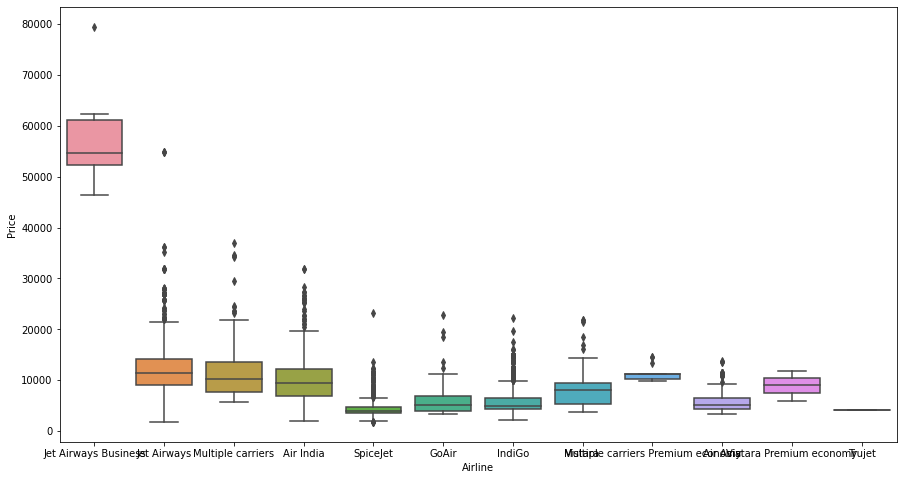

In [57]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [24]:
# One hot encoding

Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## 'Source' column

In [59]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

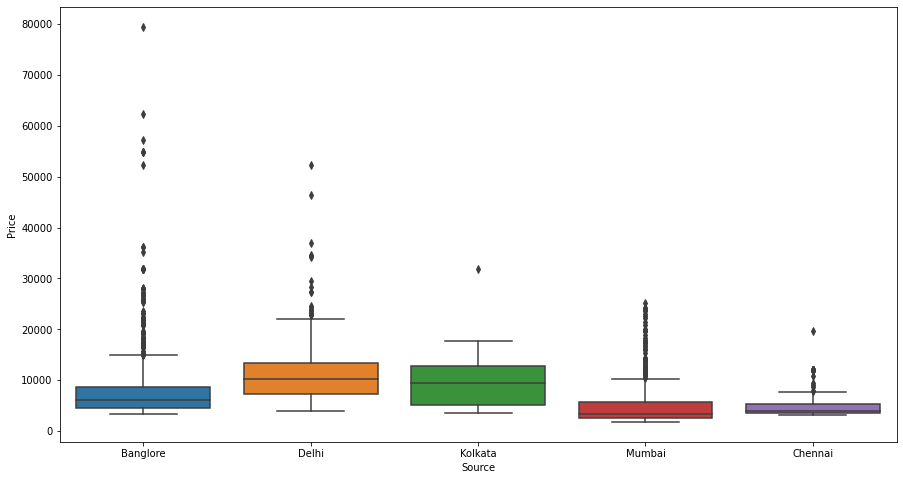

In [60]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [25]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## 'Destination' column

In [24]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

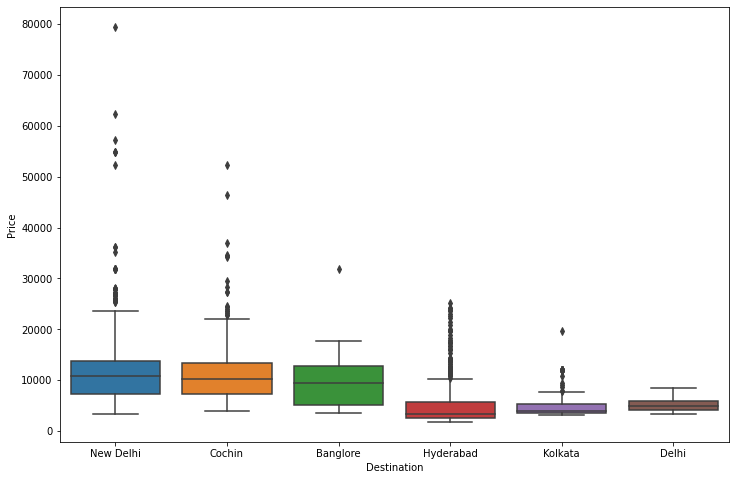

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [26]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## 'Route' column

In [30]:
categorical['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10682, dtype: object

In [30]:
categorical['Route_1']=categorical['Route'].str.split('?').str[0]
categorical['Route_2']=categorical['Route'].str.split('?').str[1]
categorical['Route_3']=categorical['Route'].str.split('?').str[2]
categorical['Route_4']=categorical['Route'].str.split('?').str[3]
categorical['Route_5']=categorical['Route'].str.split('?').str[4]

In [31]:
drop_column(categorical,'Route')

In [24]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


The columns we have created contains some null values.

In [35]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [32]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)

In [33]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [34]:
# How many categories in each column

for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())) )

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


#### To get rid of high dimensional issue occuring in hot encoding we use label encoder.

### Label Encoding on data

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# initialize the encoder

encoder=LabelEncoder()

In [37]:
for i in ['Route_1','Route_2','Route_3','Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [38]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


## 'Additional Info' column

In [44]:
categorical['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

#### We can see that there is no info available for most of the columns, so we will drop this column.

In [39]:
drop_column(categorical,'Additional_Info')

## 'Total Stops' column

In [30]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

#### We will convert these to numerical value.

In [40]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [35]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


# Concatenating the data for ML model

In [43]:
data_train=pd.concat([categorical,Airline,Source,Destination,numerical],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,2019,21,35,16,50,4,45


In [42]:
pd.set_option('display.max_columns',None)

In [44]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [45]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,2019,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,2019,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,2019,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,2019,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,2019,21,35,16,50,4,45


In [53]:
data_train.shape

(10682, 36)

# OUTLINERS

In [46]:
# function to plot distplot and boxplot

def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

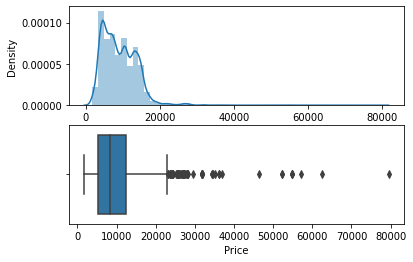

In [49]:
plot(data_train,'Price')

#### We can see huge number of outliner in the plots

In [50]:
# Remove the data which is greater than 40000 price 

data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

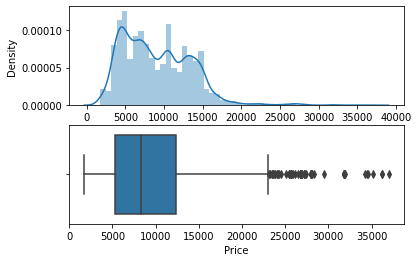

In [51]:
plot(data_train,'Price')

#### Still, the outliners are there but now they form a median.

# Seperating Independent & Dependent feature

In [52]:
# Independent feature

x=data_train.drop('Price',axis=1)
x.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_Month,Journey_Year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,2019,1,10,22,20,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,2019,13,15,5,50,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,2019,4,25,9,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,2019,23,30,18,5,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,2019,21,35,16,50,4,45


In [63]:
x.shape

(10682, 35)

In [53]:
# Dependent feature

y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

# Feature Selection

In [40]:
from sklearn.feature_selection import mutual_info_classif

#### mutual_info_classif basically assign importance to each feature and whosever feature has highest value, it means that feature is most important.

In [41]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Total_Stops,2.157457
Route_1,2.021700
Route_2,2.787156
Route_3,2.311176
Route_4,1.469256
Route_5,0.689655
Air India,0.757455
GoAir,0.091238
IndiGo,0.674330
Jet Airways,0.933074


In [42]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.787156
Route_3,2.311176
Total_Stops,2.157457
Route_1,2.021700
Arrival_Time_hour,1.827441
Duration_hour,1.801519
Cochin,1.554480
Arrival_Time_minute,1.539260
Delhi,1.519155
Route_4,1.469256


#### Route_2,Route_3 and Total_Stops are the top 3 columns which will contribute most to my target variable.
#### Whereas Trujet is the column which will contribute least to my column.

# Applying Random Forest on data

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)  # It means our train_data is 80% and test_data will be 20%

In [58]:
# Function to predict the ML model

from sklearn import metrics
import pickle

def predict(ml_model,dump):
        model=ml_model.fit(x_train,y_train)                                  #Passing train_data to model   
        print('Training Score: {}'.format(model.score(x_train,y_train)))     #Identifying the training score
        predictions=model.predict(x_test)                                    #Making a prediction
        print('Predictions are: {}'.format(predictions))
        print('\n')
        r2_score=metrics.r2_score(y_test,predictions)
        print('r2 score is: {}'.format(r2_score))
        
        print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
        print('MSE: ',metrics.mean_squared_error(y_test,predictions))
        print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
        
        sns.distplot(y_test-predictions)
        
        #Dump your model
        if dump==1:                                                          
            file=open('E:\Akansha\Datasets\Airline dataset/model.pkl','wb')
            pickle.dump(model,file)

In [47]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9545354804904918
Predictions are: [ 7839.9625      3640.70533333  8909.72       ...  6592.41
 13168.5075      3926.64      ]


r2 score is: 0.830373635425588
MAE:  1134.7566370417526
MSE:  3170842.3990294044
RMSE:  33.68614903846613


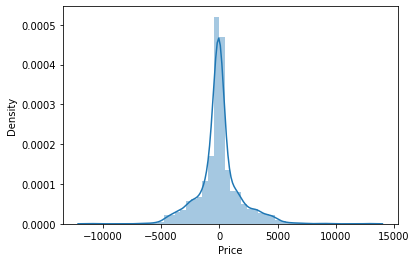

In [60]:
predict(RandomForestRegressor(),1)

#### The model has 80% accuracy.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor   # If you have large dataset never go for KNN
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.6110209136231065
Predictions are: [11614.5   3341.25 10102.25 ... 11553.75 12966.5   4596.25]


r2 score is: 0.6334351722201732
MAE:  1918.4957884885353
MSE:  6852232.557323351
RMSE:  43.800636850262066


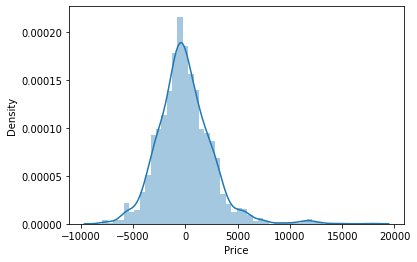

In [67]:
predict(LinearRegression(),1)

Training Score: 0.9692370689481422
Predictions are: [ 9689.  3599.  7740. ...  5406. 13376.  3419.]


r2 score is: 0.7343646715512452
MAE:  1324.0205662143192
MSE:  4965547.450354728
RMSE:  36.38709340156643


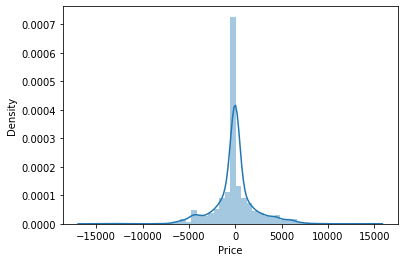

In [68]:
predict(DecisionTreeRegressor(),1)